<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Machine%20Learning%20with%20Tree-Based%20Models%20in%20Python/3%20Bagging%20and%20Random%20Forests/3_Bagging_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.


# 1. Bagging
Welcome back! In this video, you'll be introduced to an ensemble method known as Bootstrap aggregation or Bagging.

2. Ensemble Methods
In the last chapter, you learned that the Voting Classifier is an ensemble of models that are fit to the same training set using different algorithms. You also saw that the final predictions were obtained by majority voting. In Bagging, the ensemble is formed by models that use the same training algorithm. However, these models are not trained on the entire training set. Instead, each model is trained on a different subset of the data.

3. Bagging
In fact, bagging stands for bootstrap aggregation. Its name refers to the fact that it uses a technique known as the bootstrap. Overall, Bagging has the effect of reducing the variance of individual models in the ensemble.

4. Bootstrap
Let's first try to understand what the bootstrap method is. Consider the case where you have 3 balls labeled A, B, and C. A bootstrap sample is a sample drawn from this with replacement. By replacement, we mean that any ball can be drawn many times. For example, in the first bootstrap sample shown in the diagram here, B was drawn 3 times in a raw. In the second bootstrap sample, A was drawn two times while B was drawn once, and so on. You may now ask how bootstraping can help us produce an ensemble.

5. Bagging: Training
In fact, in the training phase, bagging consists of drawing N different bootstrap samples from the training set. As shown in the diagram here, each of these bootstrap samples are then used to train N models that use the same algorithm .

6. Bagging: Prediction
When a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction. The meta model collects these predictions and outputs a final prediction depending on the nature of the problem.

7. Bagging: Classification & Regression
In classification, the final prediction is obtained by majority voting. The corresponding classifier in scikit-learn is BaggingClassifier. In regression, the final prediction is the average of the predictions made by the individual models forming the ensemble. The corresponding regressor in scikit-learn is BaggingRegressor.

8. Bagging Classifier in sklearn (Breast-Cancer dataset)
Great! Now that you understand how Bagging works, let's train a BaggingClassifier in scikit-learn on the breast cancer dataset. Note that the dataset is already loaded. First import BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split and then split the data into 70%-train and 30%-test as shown here.

9. Bagging Classifier in sklearn (Breast-Cancer dataset)
Now, instantiate a classification tree dt with the parameters max_depth set to 4 and min_samples_leaf set to 0-dot-16. You can then instantiate a BaggingClassifier bc that consists of 300 classification trees dt. This can be done by setting the parameters base_estimator to dt and n_estimators to 300. In addition, set the paramter n_jobs to -1 so that all CPU cores are used in computation. Once you are done, fit bc to the training set, predict the test set labels and finally, evaluate the test set accuracy. The output shows that a BaggingClassifier achieves a test set accuracy of 93-dot-6%. Training the classification tree dt, which is the base estimator here, to the same training set would lead to a test set accuracy of 88-dot-9%. The result highlights how bagging outperforms the base estimator dt.

10. Let's practice!
Alright, now it's your time to practice.

# Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

Instructions

1. Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.

2. Instantiate a DecisionTreeClassifier called dt.

3. Instantiate a BaggingClassifier called bc consisting of 50 trees.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

Conclusion

Great! In the following exercise, you'll train bc and evaluate its test set performance.

# Evaluate Bagging performance

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

Instructions

1. Fit bc to the training set.

2. Predict the test set labels and assign the result to y_pred.

3. Determine bc's test set accuracy.

In [ ]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

'''
<script.py> output:
    Test set accuracy of bc: 0.71
'''

Conclusion

Great work! A single tree dt would have achieved an accuracy of 63% which is 8% lower than bc's accuracy!

# Out of Bag Evaluation

1. Out Of Bag Evaluation
You will now learn about Out-of-bag evaluation.

2. Bagging
Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.

3. Out Of Bag (OOB) instances
On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

4. OOB Evaluation
To understand OOB-evaluation more concretely, take a look at this diagram. Here, for each model, the bootstrap instances are shown in blue while the OOB-instances are shown in red. Each of the N models constituting the ensemble is then trained on its corresponding bootstrap samples and evaluated on the OOB instances. This leads to the obtainment of N OOB scores labeled OOB1 to OOBN. The OOB-score of the bagging ensemble is evaluated as the average of these N OOB scores as shown by the formula on top.

5. OOB Evaluation in sklearn (Breast Cancer Dataset)
Alright! Now it's time to see OOB-evaluation in action. Again, we'll be classifying cancerous cells as malignant or benign from the breast cancer dataset which is already loaded. After importing BaggingClassifier, DecisionTreeClassifier, accuracy_score and train_test_split, split the dataset in a stratified way into 70%-train and 30%-test by setting the parameter stratify to y.

6. OOB Evaluation in sklearn (Breast Cancer Dataset)
Now, first instantiate a classification tree dt with a maximum-depth of 4 and a minimum percentage of samples per leaf equal to 16%. Then instantiate a BaggingClassifier called bc that consists of 300 classification trees. This can be done by setting the parameters n_estimators to 300 and base_estimator to dt. Importantly, set the parameter oob_score to True in order to evaluate the OOB-accuracy of bc after training. Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. Now fit bc to the training set and predict the test set labels.

7. OOB Evaluation in sklearn (Breast Cancer Dataset)
Assign the test set accuracy to test_accuracy. Finally, evaluate the OOB-accuracy of bc by extracting the attribute oob_score_ from the trained instance; assign the result to oob_accuracy and print out the results. The test-set accuracy is about 93.6% and the OOB-accuracy is about 92.5%. The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

8. Let's practice!
Now let's try some examples.

# Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

Instructions

1. Import BaggingClassifier from sklearn.ensemble.

2. Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.

3. Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

Conclusion

Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.

# OOB Score vs Test Set Score

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

Instructions
100 XP
Fit bc to the training set and predict the test set labels and assign the results to y_pred.

Evaluate the test set accuracy acc_test by calling accuracy_score.

Evaluate bc's OOB accuracy acc_oob by extracting the attribute oob_score_ from bc.

In [ ]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

'''
<script.py> output:
    Test set accuracy: 0.698, OOB accuracy: 0.704
'''

Conclusion

Great work! The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

# Random Forests (RF)

. Random Forests
You will now learn about another ensemble learning method known as Random Forests.

2. Bagging
Recall that in bagging the base estimator could be any model including a decision tree, logistic regression or even a neural network. Each estimator is trained on a distinct bootstrap sample drawn from the training set using all available features.

3. Further Diversity with Random Forests
Random Forests is an ensemble method that uses a decision tree as a base estimator. In Random Forests, each estimator is trained on a different bootstrap sample having the same size as the training set. Random forests introduces further randomization than bagging when training each of the base estimators. When each tree is trained, only d features can be sampled at each node without replacement, where d is a number smaller than the total number of features.

4. Random Forests: Training
The diagram here shows the training procedure for random forests. Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that maximizes information gain. In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

5. Random Forests: Prediction
Once trained, predictions can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem.

6. Random Forests: Classification & Regression
For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is RandomForestRegressor. In general, Random Forests achieves a lower variance than individual trees.

7. Random Forests Regressor in sklearn (auto dataset)
Alright, now it's time to put all this into practice. Here, you'll train a random forests regressor to the auto-dataset which you were introduced to in previous chapters. Note that the dataset is already loaded. After importing RandomForestRegressor, train_test_split and mean_squared_error as MSE, split the dataset into 70%-train and 30%-test as shown here.

8. Random Forests Regressor in sklearn (auto dataset)
Then instantiate a RandomForestRegressor consisting of 400 regression trees. This can be done by setting n_estimators to 400. In addition, set min_samples_leaf to 0-dot-12 so that each leaf contains at least 12% of the data used in training. You can now fit rf to the training set and predict the test set labels. Finally, print the test set RMSE. The result shows that rf achieves a test set RMSE of 3-dot-98; this error is smaller than that achieved by a single regression tree which is 4-dot-43.

9. Feature Importance
When a tree based method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity. Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.

10. Feature Importance in sklearn
To visualize the importance of features as assessed by rf, you can create a pandas series of the features importances as shown here and then sort this series and make a horiztonal-barplot.

11. Feature Importance in sklearn
The results show that, according to rf, displ, size, weight and hp are the most predictive features.

12. Let's practice!
Now let's try some examples.

# Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

Instructions

1. Import RandomForestRegressor from sklearn.ensemble.

2. Instantiate a RandomForestRegressor called rf consisting of 25 trees.

3. Fit rf to the training set.

In [ ]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

Conclusion

Great work! Next comes the test set RMSE evaluation part.

# Evaluate the RF regressor

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

Instructions

1. Import mean_squared_error from sklearn.metrics as MSE.

2. Predict the test set labels and assign the result to y_pred.

3. Compute the test set RMSE and assign it to rmse_test.

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

'''
<script.py> output:
    Test set RMSE of rf: 51.97
'''

Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

# Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

Instructions

1. Call the .sort_values() method on importances and assign the result to importances_sorted.

2. Call the .plot() method on importances_sorted and set the arguments:

 - kind to 'barh'
 - color to 'lightgreen'

In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind ='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

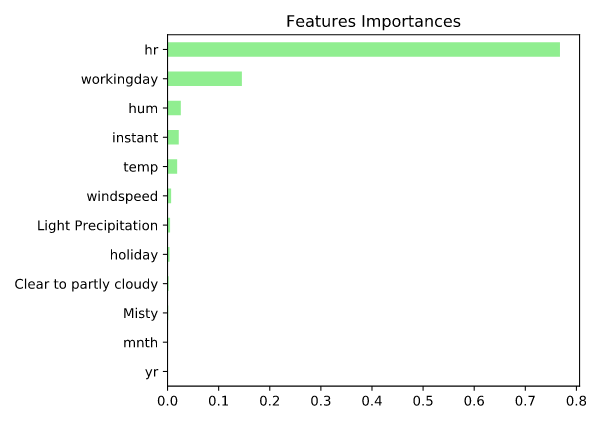

Conclusion

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!